In [60]:
import numpy as np
import pandas as pd
import scipy.interpolate as interp
import pathlib
import matplotlib.pyplot as plt

In [61]:
data_folder = pathlib.Path(
    r"/Users/jcapriot/OneDrive - Colorado School of Mines/gpgn_318_2025/Lab13/MAG_CSVs_From_Joe"
)
data_file = data_folder/"g858_5.csv"
data_file.exists()

True

In [62]:
data_frame = pd.read_csv(data_file)
data_frame

,Lat (Deg N),Lon (Deg E),MST (Seconds),Date (MM/DD/YY),Top Sensor (nT),Bottom Sensor (nT),Easting (m),Northing (m),UTM Zone
0,39.751290,-105.221480,56873.4,11/20/25,49687.276,48813.376,481026.135445,4.400177e+06,13S
1,39.751295,-105.221471,56872.4,11/20/25,50692.659,51146.426,481026.852389,4.400177e+06,13S
2,39.751302,-105.221459,56871.4,11/20/25,0.000,51448.422,481027.940211,4.400178e+06,13S
3,39.751310,-105.221445,56870.4,11/20/25,50385.460,50338.255,481029.129920,4.400179e+06,13S
4,39.751318,-105.221431,56869.4,11/20/25,50220.706,50164.137,481030.362112,4.400180e+06,13S
...,...,...,...,...,...,...,...,...,...
870,39.751395,-105.221543,56003.4,11/20/25,50291.284,50295.070,481020.761677,4.400189e+06,13S
871,39.751390,-105.221552,56002.4,11/20/25,50307.099,50347.956,481019.962163,4.400188e+06,13S
872,39.751385,-105.221560,56001.4,11/20/25,50300.350,50365.835,481019.294587,4.400187e+06,13S
873,39.751384,-105.221566,56000.4,11/20/25,50294.299,50262.285,481018.797823,4.400187e+06,13S


In [63]:
eastings = np.asarray(data_frame['Easting (m)'])[::-1]
northings = np.asarray(data_frame['Northing (m)'])[::-1]
time = np.asarray(data_frame["MST (Seconds)"])[::-1]
data_top = np.asarray(data_frame["Top Sensor (nT)"])[::-1]
data_bot = np.asarray(data_frame["Bottom Sensor (nT)"])[::-1]

top_filt = (data_top > 49250) & (data_top < 55000)
bot_filt = (data_bot > 49250) & (data_bot < 55000)

In [67]:
e_func = interp.CubicSpline(time, eastings)
n_func = interp.CubicSpline(time, northings)

In [68]:
eval_points = np.linspace(time.min(), time.max(), 128)

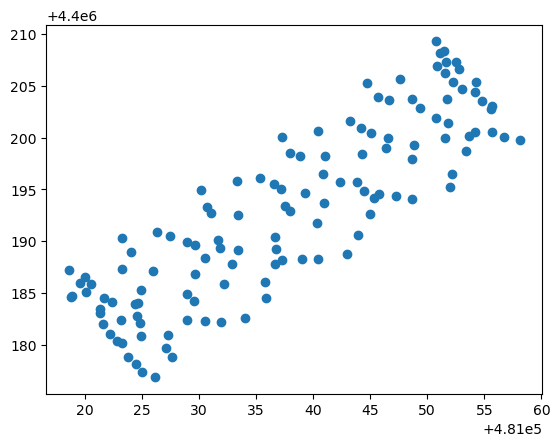

In [69]:
plt.scatter(e_func(eval_points), n_func(eval_points))

In [70]:
v_e_func = e_func.derivative()
v_n_func = n_func.derivative()

In [56]:
dirs = np.c_[v_e_func(time), v_n_func(time)]
dirs /= np.linalg.norm(dirs, axis=1, keepdims=True)

In [88]:
offset = 0.8
shift_x = dirs[:, 0] * offset
shift_y = dirs[:, 1] * offset
e_corr = eastings + shift_x
n_corr = northings + shift_y

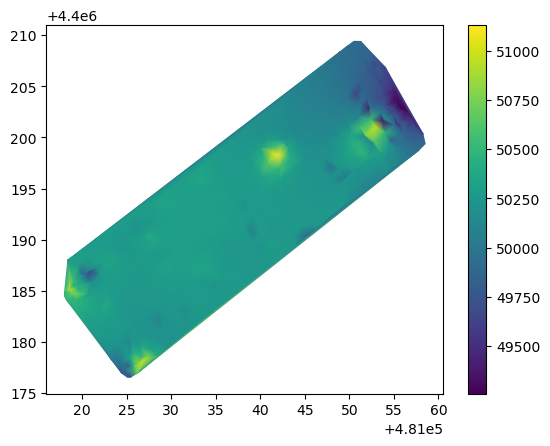

In [89]:
plt.tripcolor(e_corr[top_filt], n_corr[top_filt], data_top[top_filt], shading='gouraud')
plt.colorbar()

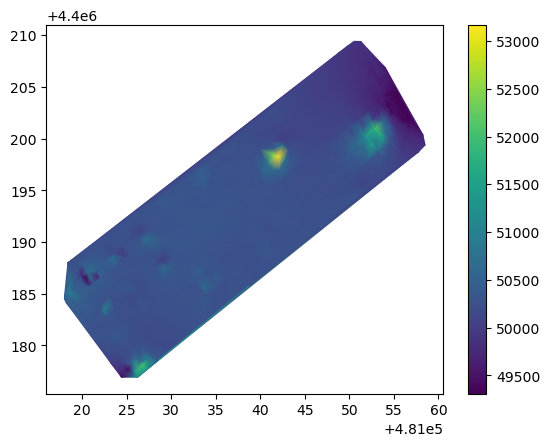

In [90]:
plt.tripcolor(e_corr[bot_filt], n_corr[bot_filt], data_bot[bot_filt], shading='gouraud')
plt.colorbar()